In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.cluster import KMeans
import seaborn.objects as so
from statsmodels.stats import proportion

/Group16T/common/chenh2/miniconda3/envs/ml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-08 14:50:57.564183: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-08 14:50:57.567460: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-08 14:50:57.604302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-08 14:50:57.604321: E external/local_xla/xla/stream_executor/c

In [2]:
#all, TNKI, THM, YCTKP, TCN, HT
# load data
file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_female.csv"

df = pd.read_csv(file_path)

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_65+yr_female.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
df['rate65']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_50-64yr_female.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y50_64 = temp["rate"].values
df['rate50_64']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr_female.csv"
#file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y30_49 = temp["rate"].values
df['rate30_49']= temp["rate"]

#df = df.iloc[:, 73:] # only use air polution data

#group = file_path.split("\\")[-1].replace(".csv", "")

# === 特徵與目標 ===
#drop_cols = ["day", "Count_all", "Count_cvd", "rate", "rate65",'rate50_64','rate30_49']
#features = [col for col in df.columns if col not in drop_cols]
#X = df[features].values
y_female = df["rate"].values
y65_female = df["rate65"].values
y50_64_female = df["rate50_64"].values
y30_49_female = df["rate30_49"].values
#y = df["Count_cvd"].values

In [3]:
len(y50_64_female)

8797

In [4]:
#all, TNKI, THM, YCTKP, TCN, HT
# load data
file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_male.csv"

df = pd.read_csv(file_path)

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_65+yr_male.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
df['rate65']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_50-64yr_male.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y50_64 = temp["rate"].values
df['rate50_64']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr_male.csv"
#file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y30_49 = temp["rate"].values
df['rate30_49']= temp["rate"]

#df = df.iloc[:, 73:] # only use air polution data

#group = file_path.split("\\")[-1].replace(".csv", "")

# === 特徵與目標 ===
#drop_cols = ["day", "Count_all", "Count_cvd", "rate", "rate65",'rate50_64','rate30_49']
#features = [col for col in df.columns if col not in drop_cols]
#X = df[features].values
y_male = df["rate"].values
y65_male = df["rate65"].values
y50_64_male = df["rate50_64"].values
y30_49_male = df["rate30_49"].values
#y = df["Count_cvd"].values

In [5]:
len(y50_64_male)

8797

In [6]:
#all, TNKI, THM, YCTKP, TCN, HT
# load data
file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all.csv"

df = pd.read_csv(file_path)

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_65+yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
df['rate65']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_50-64yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y50_64 = temp["rate"].values
df['rate50_64']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr.csv"
#file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y30_49 = temp["rate"].values
df['rate30_49']= temp["rate"]

#df = df.iloc[:, 73:] # only use air polution data

#group = file_path.split("\\")[-1].replace(".csv", "")

# === 移除 NaN ===
#df = df.dropna().reset_index(drop=True)

# === 特徵與目標 ===
#drop_cols = ["day", "Count_all", "Count_cvd", "rate", "rate65",'rate50_64','rate30_49']
#features = [col for col in df.columns if col not in drop_cols]
#X = df[features].values
y = df["rate"].values
y65 = df["rate65"].values
y50_64 = df["rate50_64"].values
y30_49 = df["rate30_49"].values
#y = df["Count_cvd"].values

In [7]:
df.shape

(8797, 191)

In [8]:
#unify the length
df["rate_female"] = y_female
df["rate65_female"] = y65_female
df["rate50_64_female"] = y50_64_female
df["rate30_49_female"] = y30_49_female
df["rate_male"] = y_male
df["rate65_male"] = y65_male
df["rate50_64_male"] = y50_64_male
df["rate30_49_male"] = y30_49_male

# === 移除 NaN ===
df = df.dropna().reset_index(drop=True)

drop_cols = ["day", "Count_all", "Count_cvd", "rate", "rate65",'rate50_64','rate30_49','rate_male','rate65_male','rate50_64_male','rate30_49_male','rate_female','rate65_female','rate50_64_female','rate30_49_female']
features = [col for col in df.columns if col not in drop_cols]
X = df[features].values

y = df["rate"].values
y65 = df["rate65"].values
y50_64 = df["rate50_64"].values
y30_49 = df["rate30_49"].values

y_male = df["rate_male"].values
y65_male = df["rate65_male"].values
y50_64_male = df["rate50_64_male"].values
y30_49_male = df["rate30_49_male"].values

y_female = df["rate_female"].values
y65_female = df["rate65_female"].values
y50_64_female = df["rate50_64_female"].values
y30_49_female = df["rate30_49_female"].values

In [9]:
df.shape

(8336, 199)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
date = df["day"].values
year = []
month = []
for n in date:
    [temp1, temp2,temp3] = n.split('-')
    year.append(int(temp1))
    month.append(int(temp2))
#year = np.array(year)
month = np.array(month)

In [12]:
df[features] = X_scaled
df['year'] = year
df['month'] = month

/tmp/ipykernel_836462/3097774729.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year'] = year
/tmp/ipykernel_836462/3097774729.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['month'] = month


In [13]:
# Define a function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(month_to_season)

/tmp/ipykernel_836462/1648050244.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['season'] = df['month'].apply(month_to_season)


In [14]:
reducer = umap.UMAP(random_state=54)
#reducer = umap.UMAP(random_state=5)
#reducer = umap.UMAP(random_state=40)
embedding = reducer.fit_transform(X_scaled)
embedding.shape

/Group16T/common/chenh2/miniconda3/envs/ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(8336, 2)

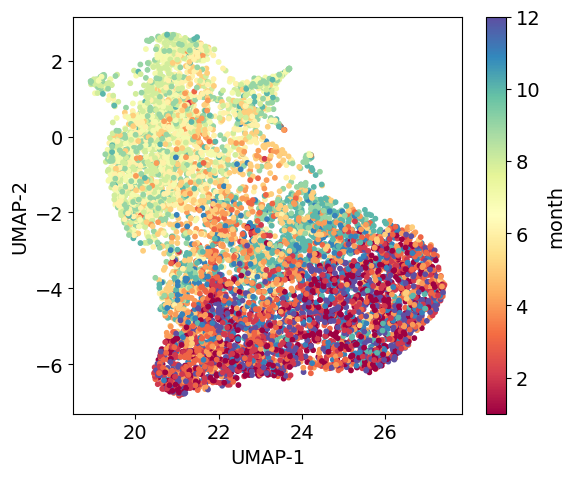

In [15]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=df.month, s=10, cmap='Spectral')
cb = plt.colorbar(scat)
cb.set_label('month')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by month')
plt.tight_layout(); plt.show()

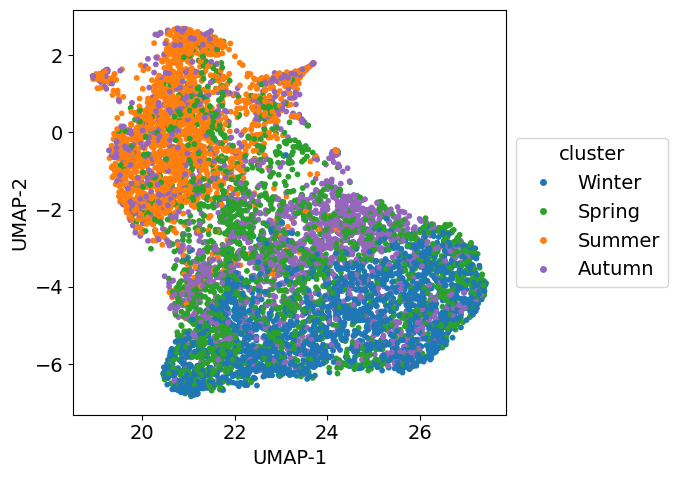

In [16]:
plt.figure(figsize=(7, 5))
plt.rcParams.update({'font.size': 14}) 

season_to_color = {'Winter':'#1f77b4','Spring':'#2ca02c','Summer':'#ff7f0e','Autumn':'#9467bd'}
colors = df['season'].map(season_to_color).to_numpy()

scat = plt.scatter(embedding[:,0], embedding[:,1], c=colors, s=10)

handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Winter', markerfacecolor='#1f77b4', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Spring', markerfacecolor='#2ca02c', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Summer', markerfacecolor='#ff7f0e', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Autumn', markerfacecolor='#9467bd', markersize=6)
]
plt.legend(handles=handles, title='cluster',loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

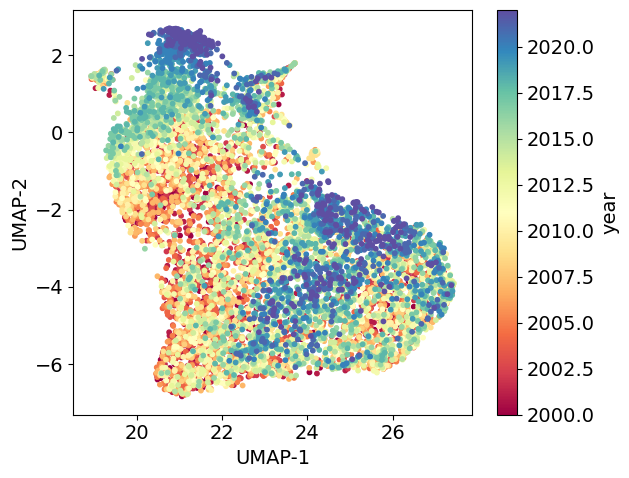

In [17]:
plt.figure(figsize=(6.5, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=df.year, s=10, cmap='Spectral')
cb = plt.colorbar(scat)
cb.set_label('year')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

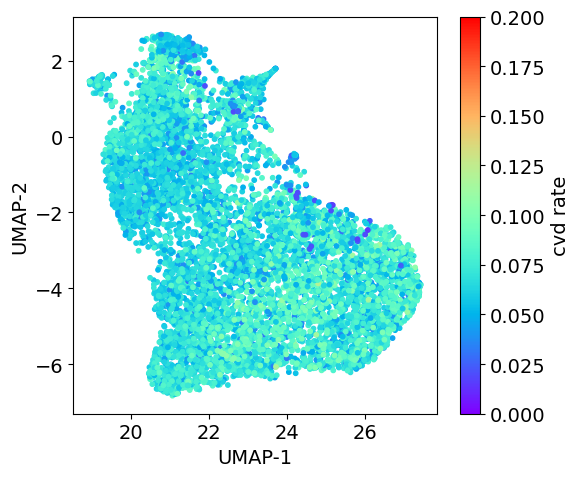

In [44]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y_male, s=10, cmap='rainbow',vmax=0.2,vmin=0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y, s=3, cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

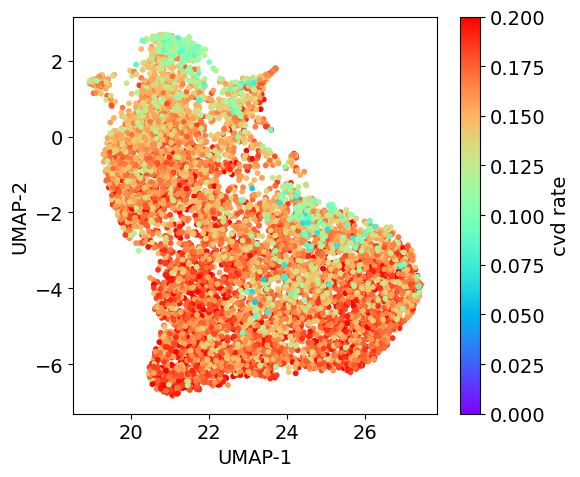

In [51]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y65_male, s=10, cmap='rainbow',vmax=0.20,vmin=0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y65, s=3,cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

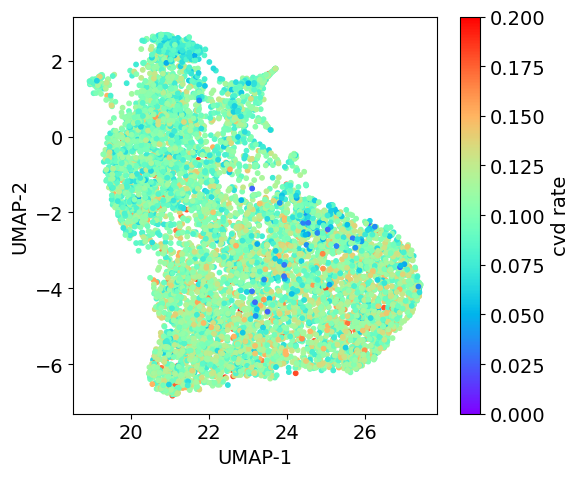

In [52]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y50_64_male, s=10, cmap='rainbow',vmax=0.2,vmin=0.0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y50_64, s=3,cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

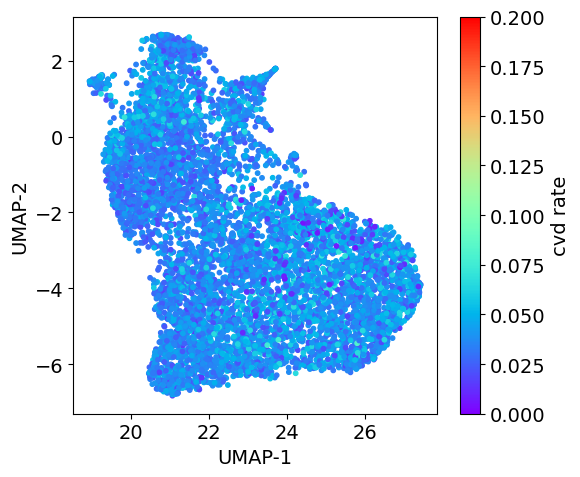

In [53]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y30_49_male, s=10, cmap='rainbow',vmax=0.2,vmin=0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y30_49, s=3,cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

In [23]:
y_pred = KMeans(n_clusters=2,n_init=100,random_state=30).fit_predict(X_scaled)
#df['cluster']=np.char.mod('%d', y_pred)

df['cluster_raw'] = y_pred

# Determine which cluster is smaller
cluster_counts = df['cluster_raw'].value_counts().to_dict()
small_cluster = min(cluster_counts, key=cluster_counts.get)

# Remap: smaller cluster → 0, larger → 1
df['cluster'] = df['cluster_raw'].apply(lambda x: 0 if x == small_cluster else 1)

# Convert to string (e.g., 'Cluster_0' / 'Cluster_1')
df['cluster_str'] = df['cluster'].astype(str)

#status_mapping = {0: '0', 1: '1',}
#df['cluster'] = df['cluster'].map(status_mapping)

/tmp/ipykernel_836462/457334968.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster_raw'] = y_pred
/tmp/ipykernel_836462/457334968.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = df['cluster_raw'].apply(lambda x: 0 if x == small_cluster else 1)
/tmp/ipykernel_836462/457334968.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [24]:
df['cluster'].value_counts()

cluster
1    5757
0    2579
Name: count, dtype: int64

In [25]:
df['cluster_str'].value_counts()

cluster_str
1    5757
0    2579
Name: count, dtype: int64

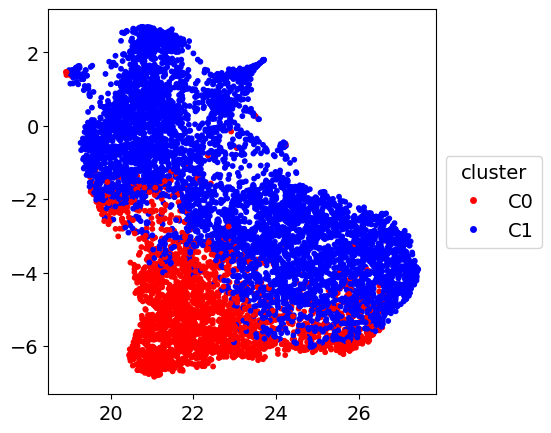

In [26]:
#colors = ['red' if label == 0 else 'blue' for label in y_pred]
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=df['cluster'], s=10, cmap='bwr_r')
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=df['cluster'], s=10, cmap='bwr_r')

# Create custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='C0', markerfacecolor='red', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='C1', markerfacecolor='blue', markersize=6)
]
plt.legend(handles=handles, title='cluster',loc='center left',bbox_to_anchor=(1.0, 0.5))

In [27]:
target_y = y30_49
threshold = np.mean(target_y)
#using chi2 to test the proportion of high CVD (> average counts) byetween two kmeans clusters
cvd_risk = []
for n in target_y:
    if n > threshold:
        cvd_risk.append('high')
    else:
        cvd_risk.append('low')
df['cvd_risk'] = cvd_risk

/tmp/ipykernel_836462/4109077205.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cvd_risk'] = cvd_risk


Chi-square statistic: 19.023398420800675
p-value: 1.2912532492088764e-05


/tmp/ipykernel_836462/2461966734.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [a[0], a[2]]


<Figure size 600x500 with 0 Axes>

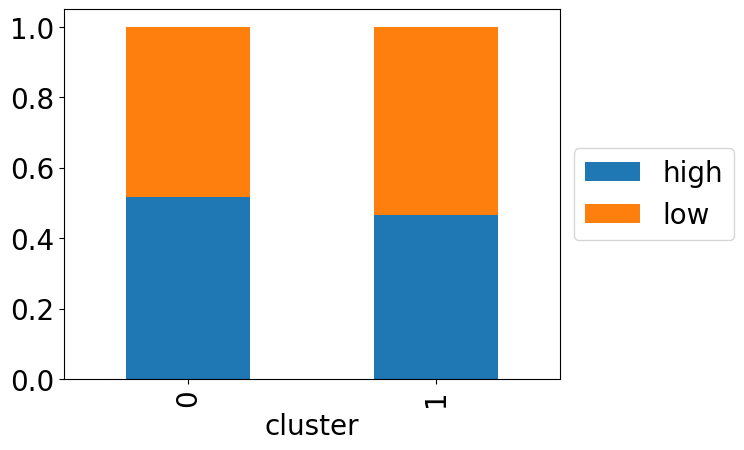

In [28]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 20}) 

#https://stackoverflow.com/questions/43074199/how-to-plot-stacked-normalized-histograms
# Count all entries for all scores and all categories
a = df.groupby([df['cluster_str'], 'cvd_risk']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['cvd_risk'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
df_a.unstack().plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

count = [a[0], a[2]]
nobs = [b['0'], b['1']]

statistic, pval, table = proportion.proportions_chisquare(count, nobs)

plt.xlabel('cluster')
print("Chi-square statistic:", statistic)
print("p-value:", pval)

In [29]:
table

(array([[1336., 1243.],
        [2685., 3072.]]),
 array([[1244.02099328, 1334.97900672],
        [2776.97900672, 2980.02099328]]))

In [30]:
a

cluster_str  cvd_risk
0            high        1336
             low         1243
1            high        2685
             low         3072
dtype: int64

Text(0.5, 0, 'cluster')

<Figure size 400x400 with 0 Axes>

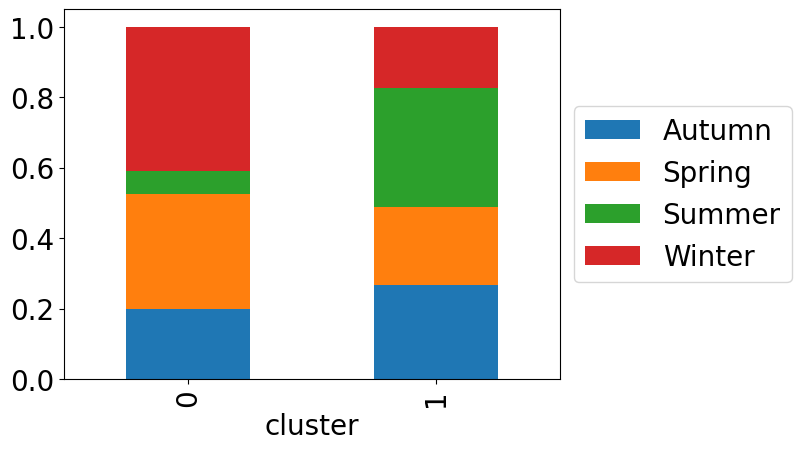

In [31]:
# Count all entries for all scores and all categories
plt.figure(figsize=(4, 4))
plt.rcParams.update({'font.size': 20}) 
a = df.groupby([df['cluster_str'], 'season']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['season'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
df_a.unstack().plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('cluster')

/tmp/ipykernel_836462/2971945609.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

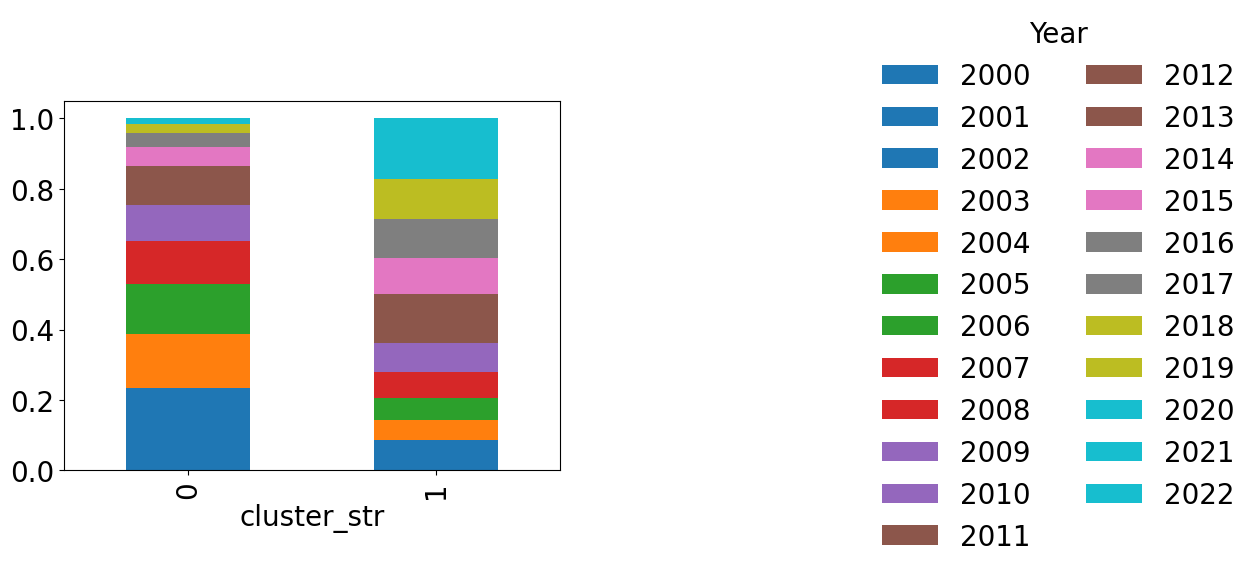

In [32]:
# Count all entries for all scores and all categories
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 20}) 
a = df.groupby([df['cluster_str'], 'year']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['year'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
ax =df_a.unstack().plot.bar(stacked=True, colormap='tab10')
# Put legend in 2–3 columns
ax.legend(
    title='Year',
    loc='center left',           # or 'center left'
    bbox_to_anchor=(1.6, 0.5),  # place below the plot
    ncol=2,                       # number of columns (adjust to fit)
    frameon=False
)
plt.tight_layout()
plt.show()

/tmp/ipykernel_836462/275469193.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

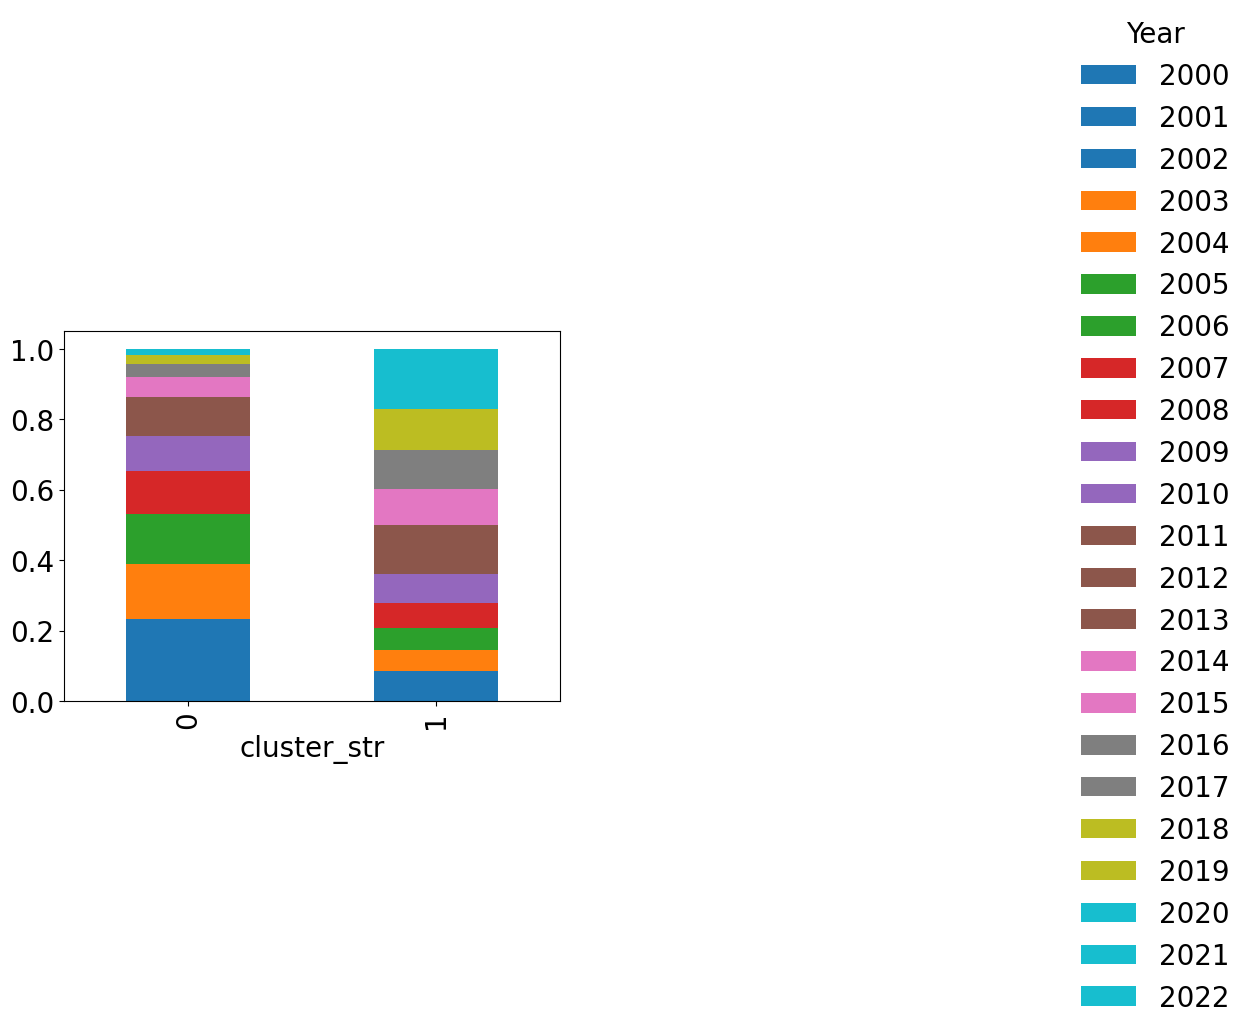

In [33]:
# Count all entries for all scores and all categories
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 20}) 
a = df.groupby([df['cluster_str'], 'year']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['year'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
ax =df_a.unstack().plot.bar(stacked=True, colormap='tab10')
# Put legend in 2–3 columns
ax.legend(
    title='Year',
    loc='center left',           # or 'center left'
    bbox_to_anchor=(2, 0.5),  # place below the plot
    ncol=1,                       # number of columns (adjust to fit)
    frameon=False
)
plt.tight_layout()
plt.show()

Text(0.5, 15.444444444444445, 'cvd rate')

<Figure size 600x500 with 0 Axes>

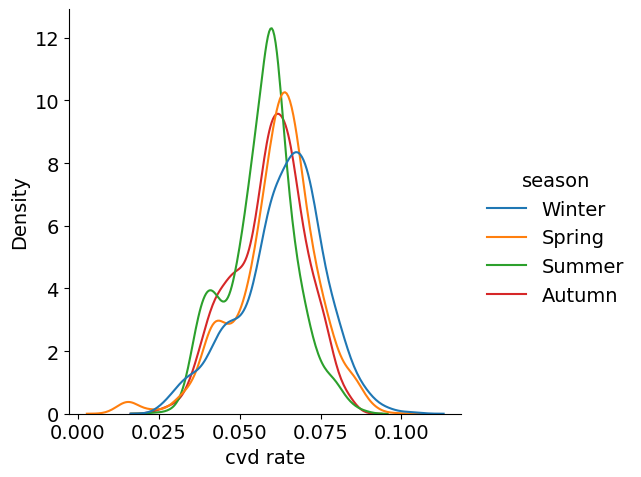

In [34]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
sns.displot(
    data=df,
    x="rate", hue="season",  kind="kde"
)
plt.xlabel('cvd rate')

In [35]:
#df.iloc[:, 73:].columns.tolist()